In [4]:
##Importing libraries.

import numpy as np
import  pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import cv2

In [5]:
##importing an image and converting bgr to rgb.
im = cv2.imread('/home/abhishek/Desktop/elephant.jpg')
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print original_shape

(330, 500, 3)


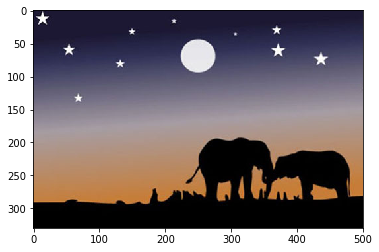

In [6]:
##displaying the image using matplotlib.
plt.imshow(im)
plt.show()

In [7]:
##Flatten each channel of the image
all_pixels = im.reshape(-1,3)
print(all_pixels.shape)

(165000, 3)


In [8]:
##importing kmeans from sklearn
from sklearn.cluster import KMeans

In [9]:
##appling kmeans to get our dominant colors.
dominant_colors = 4
km = KMeans(n_clusters = dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
##centers refer to the dominant colors/cluster centers of kmean algo.
centers = km.cluster_centers_

In [11]:
centers = np.array(centers, dtype='uint8')

In [12]:
##these are the rgb values of all the 4 cluster centers or we can say our dominant colors.
print centers

[[174 145 128]
 [  1   0   1]
 [ 98  94 117]
 [ 38  35  64]]


In [13]:
##plotting what actually are the dominant colors.

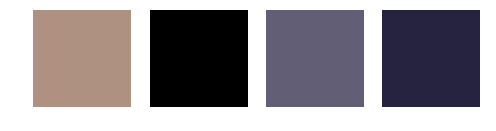

In [14]:
i = 1
plt.figure(0,figsize=(8,2))
colors = []
for each_col in centers:
    plt.subplot(1,4,i)
    i+=1
    plt.axis("off")
    colors.append(each_col)
    
    ##color Swatch(peice of color to just demonstrate how it looks like).
    a = np.zeros((100,100,3), dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
plt.show()

In [15]:
##IMAGE SEGMENTING - ASSIGNING DOMINANT COLORS TO EACH PIXEL OF THE ORIGINAL IMAGE.

new_img = np.zeros((330*500,3),dtype='uint8')

print(new_img.shape)

(165000, 3)


In [16]:
##assigns labels from 0,1,2,3 to each pixel according to K means matching.
km.labels_

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

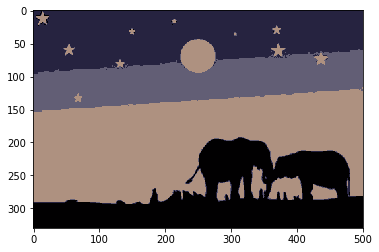

In [17]:
##Plotting the figure by giving each pixel a dominant color.
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()